## 5.14　应用：人脸识别管道

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set() 
import numpy as np

### HOG特征

<p>方向梯度直方图是一个简单的特征提取程序，专门用来识别有行人（pedestrians）的图像
内容。HOG 方法包含以下五个步骤。</p>
<p>(1) 图像标准化（可选），消除照度对图像的影响。</p>
<p>(2) 用与水平和垂直方向的亮度梯度相关的两个过滤器处理图像，捕捉图像的边、角和纹理
信息。</p>
<p>(3) 将图像切割成预定义大小的图块，然后计算每个图块内梯度方向的频次直方图。</p>
<p>(4) 对比每个图块与相邻图块的频次直方图，并做标准化处理，进一步消除照度对图像的
影响。</p>
<p>(5) 获得描述每个图块信息的一维特征向量。</p>

D:\Program Files (x86)\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


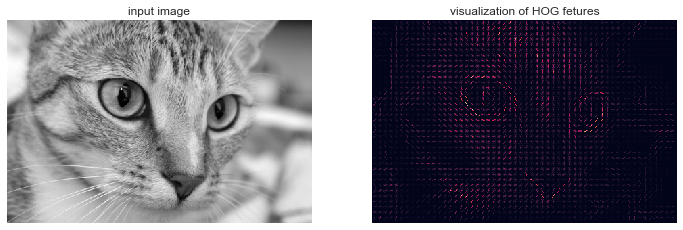

In [9]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hov_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG fetures');

### 5.14.2 HOG实战：简单人脸识别器

有了图像的 HOG 特征后，就可以用 Scikit-Learn 的任意评估器建立一个简单人脸识别算
法，这里使用线性支持向量机,具体步骤如下。

<p>(1) 获取一组人脸图像缩略图，构建“正”（positive）训练样本。</p>
<p>(2) 获取另一组人脸图像缩略图，构建“负”（negative）训练样本。</p>
<p>(3) 提取训练样本的 HOG 特征。</p>
<p>(4) 对样本训练一个线性 SVM 模型。</p>
<p>(5) 为“未知”图像传递一个移动的窗口，用模型评估窗口中的内容是否是人脸。</p>
<p>(6) 如果发现和已知图像重叠，就将它们组合成一个窗口。</p>

In [16]:
# （1）：Obtain a set of positive training samples
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)


RuntimeError: Failed to read the image file C:\Users\asus\scikit_learn_data\lfw_home\lfw_funneled\George_HW_Bush\George_HW_Bush_0003.jpg, Please make sure that libjpeg is installed